In [ ]:
import json
import numpy as np
import csv
with open("Recipes 2018-07-24 (all AF, production).json", encoding="utf-8") as d:
    df = json.load(d)

In [3]:
from recipe import recipe
from renew import renew
from time import time

C:\Users\320033853\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


## Transfer dataset into suitable format

In [4]:
df_new = [ renew(x) for x in df["recipes"] ]

In [5]:
for x in df_new:
    r = recipe(x)
    x["ingr_diff"] = r.ingr_diff()
    x["time_diff"] = r.time_diff()
    x["step_diff"] = r.step_diff()
    x["overall_diff"] = r.overall_diff()
    x["ingr_name"] = sorted(r.get_ingr_name(),key=str.lower)
    x["main_ingr"] = sorted(list(r.get_main_ingr().keys()),key=str.lower)
    x["other_ingr"] = sorted(list(r.get_other_ingr().keys()),key=str.lower)
    x["seasoning_ingr"] = sorted(list(r.get_seasoning_ingr().keys()),key=str.lower)

In [6]:
keys = df_new[0].keys()
with open("df_new.csv", "w+", newline="", encoding="utf8") as out:
    dict_writer = csv.DictWriter(out, keys)
    dict_writer.writeheader()
    dict_writer.writerows(df_new)

## Create matrix for clustering

In [7]:
r = [ recipe(x) for x in df_new ]

In [7]:
tic = time()
matrix_seasoning = np.zeros(shape=(len(r),len(r)))
for i in range(len(r)):
    matrix_seasoning[i][i] = 1
    for j in range(i+1, len(r)):
        matrix_seasoning[i][j] = r[i].seasoning_sim(r[j])
        matrix_seasoning[j][i] = matrix_seasoning[i][j]
toc = time()
print("%fs elasped" % (toc - tic))

10.735610s elasped


In [12]:
with open("matrix_seasoning.csv", "w+", newline="", encoding="utf8") as out:
    csv_out=csv.writer(out)
    for row in matrix_seasoning:
        csv_out.writerow(row)

In [8]:
tic = time()
matrix_main = np.zeros(shape=(len(r),len(r)))
for i in range(len(r)):
    matrix_main[i][i] = 1
    for j in range(i+1, len(r)):
        matrix_main[i][j] = r[i].main_sim(r[j])
        matrix_main[j][i] = matrix_main[i][j]
toc = time()
print("%fs elasped" % (toc - tic))

9.782519s elasped


In [14]:
with open("matrix_main.csv", "w+", newline="", encoding="utf8") as out:
    csv_out=csv.writer(out)
    for row in matrix_main:
        csv_out.writerow(row)

In [9]:
tic = time()
matrix_flavor = np.zeros(shape=(len(r),len(r)))
for i in range(len(r)):
    matrix_flavor[i][i] = 1
    for j in range(i+1, len(r)):
        matrix_flavor[i][j] = r[i].flavor_sim(r[j])
        matrix_flavor[j][i] = matrix_flavor[i][j]
toc = time()
print("%fs elasped" % (toc - tic))

75.893528s elasped


In [16]:
with open("matrix_flavor.csv", "w+", newline="", encoding="utf8") as out:
    csv_out=csv.writer(out)
    for row in matrix_flavor:
        csv_out.writerow(row)

In [8]:
tic = time()
matrix_overall = np.zeros(shape=(len(r),len(r)))
for i in range(len(r)):
    matrix_overall[i][i] = 1
    for j in range(i+1, len(r)):
        matrix_overall[i][j] = r[i].overall_sim(r[j])
        matrix_overall[j][i] = matrix_overall[i][j]
toc = time()
print("%fs elasped" % (toc - tic))

24.118975s elasped


In [20]:
with open("matrix_overall.csv", "w+", newline="", encoding="utf8") as out:
    csv_out=csv.writer(out)
    for row in matrix_overall:
        csv_out.writerow(row)

### overall slow matrix may take 10 mins to output

In [11]:
tic = time()
matrix_seasoning_slow=np.zeros(shape=(len(r),len(r)))
for i in range(len(r)):
    matrix_seasoning_slow[i][i] = 1
    for j in range(i+1, len(r)):
        matrix_seasoning_slow[i][j] = r[i].seasoning_sim(r[j], isFast=False)
        matrix_seasoning_slow[j][i] = matrix_seasoning_slow[i][j]
toc = time()
print("%fs elasped" % (toc - tic))

20.268311s elasped


In [15]:
with open("matrix_seasoning_slow.csv", "w+", newline="", encoding="utf8") as out:
    csv_out=csv.writer(out)
    for row in matrix_seasoning_slow:
        csv_out.writerow(row)

In [12]:
tic = time()
matrix_main_slow = np.zeros(shape=(len(r),len(r)))
for i in range(len(r)):
    matrix_main_slow[i][i] = 1
    for j in range(i+1, len(r)):
        matrix_main_slow[i][j] = r[i].main_sim(r[j], isFast=False)
        matrix_main_slow[j][i] = matrix_main_slow[i][j]
toc = time()
print("%fs elasped" % (toc - tic))

27.347384s elasped


In [16]:
with open("matrix_main_slow.csv", "w+", newline="", encoding="utf8") as out:
    csv_out=csv.writer(out)
    for row in matrix_main_slow:
        csv_out.writerow(row)

In [13]:
tic = time()
matrix_flavor_slow = np.zeros(shape=(len(r),len(r)))
for i in range(len(r)):
    matrix_flavor_slow[i][i] = 1
    for j in range(i+1, len(r)):
        matrix_flavor_slow[i][j] = r[i].flavor_sim(r[j], isFast=False)
        matrix_flavor_slow[j][i] = matrix_flavor_slow[i][j]
toc = time()
print("%fs elasped" % (toc - tic))

359.647695s elasped


In [18]:
with open("matrix_flavor_slow.csv", "w+", newline="", encoding="utf8") as out:
    csv_out=csv.writer(out)
    for row in matrix_flavor_slow:
        csv_out.writerow(row)

In [19]:
tic = time()
matrix_overall_slow = np.zeros(shape=(len(r),len(r)))
for i in range(len(r)):
    matrix_overall_slow[i][i] = 1
    for j in range(i+1, len(r)):
        matrix_overall_slow[i][j] = r[i].overall_sim(r[j], isFast=False)
        matrix_overall_slow[j][i] = matrix_overall_slow[i][j]
toc = time()
print("%fs elasped" % (toc - tic))

410.866744s elasped


In [21]:
with open("matrix_overall_slow.csv", "w+", newline="", encoding="utf8") as out:
    csv_out=csv.writer(out)
    for row in matrix_overall_slow:
        csv_out.writerow(row)

In [9]:
#import matrix if necessary
#matrix_overall=np.genfromtxt('matrix_overall.csv', delimiter=',')
matrix_overall_slow=np.genfromtxt('matrix_overall_slow.csv', delimiter=',')

## infomap clustering

In [15]:
from igraph import *

In [16]:
titles = [ r["title"] + ":" + r["short_content_id"] for r in df["recipes"] ]
w_mat = matrix_flavor_slow

In [17]:
weighted_graph = Graph.Full(len(titles))
weighted_graph.es["weight"] = 1
weighted_graph.vs["name"] = titles
for i in range(len(titles)):
    for j in range(i+1, len(titles)):
        weighted_graph[i, j] = w_mat[i, j]

In [18]:
sgs = weighted_graph.community_infomap(edge_weights="weight").subgraphs()

In [19]:
for g, m in zip(sgs, range(len(sgs))):
    names = g.vs["name"]
    print("#%d: %s" % (m+1, names))

#1: ['Fish lasagna with beets:MR-931538C8', 'Honey & Lemon roasted chicken:MR-A750E68D', 'Spring Rolls:MR-2942CCA5', 'Spicy chicken drumsticks:MR-6D966ECC', 'Italian Style Lobster:MR-BDE5A10A', 'Roasted pumpkin seeds:MR-9D23D6CA', 'Fried Prawns:MR-F3762FC9', 'Chicken and bell pepper kebab with couscous:MR-74E36426', 'Bruschetta:MR-DF60E09C', 'Fried hot prawns:MR-F120D18B', 'Crispy Potato Skin Wedges:MR-E62EFA82', 'Roasted stuffed Radicchio:MR-FDCE0D81', 'Beef Meatballs:MR-5F4074E4', 'Gorgonzola Apple Pizza:MR-A5F72C98', 'Baked Apples Filled with Dates and Chestnuts:MR-12CDE58C', 'Pizza dough:MR-E8011754', 'Grilled golden corn cobs:MR-E9944637', 'Baked mini spinach quiches:MR-917C86AE', 'Banana bread:MR-9E70A360', 'Savory spiced carrot cake:MR-0E255000', 'Spicy Farmhouse Bread:MR-82D3C3F4', 'Aalu Samosa:MR-436C9026', 'Potatoes au Gratin:MR-4B27F316', 'Wax Apple and Celery:MR-DE0A0BEE', 'Salmon Roll :MR-42EF2F27', 'Yoghurt dip:MR-970BDE3A', '[undefAm, undefUnit]Apricot blackberry crumble

### Affinity propagation

In [54]:
from sklearn.cluster import AffinityPropagation

In [35]:
w_mat = matrix_main_slow

In [36]:
af = AffinityPropagation(affinity="precomputed", verbose=True).fit(w_mat)

Converged after 71 iterations.


In [37]:
grouped = [ [ titles[i] for i, v in enumerate(list(af.labels_)) if v == l ] for l in set(af.labels_) ]

In [39]:
for i, g in enumerate(grouped):
    print("#%d: %s" % (i, g))

#0: ['Fish lasagna with beets:MR-931538C8', 'Roasted Lamb with fresh vegetables:MR-6CC9A92C', 'Crispy fried spring rolls:MR-4D2E8C44', 'Fish salad with crunchy trout:MR-C5A5117C', 'Fish en Papillote:MR-CD55293E', 'Salmon Quiche:MR-5534A374', 'Salmon with herb crust and green vegetable:MR-4D32EA72', 'Salmon quiche:MR-C9854F9D', 'Fish burger:MR-0C4FE9DA', 'Potato and chicken salad with spring vegetables:MR-91CB7432', 'Fish burger with remoulade sauce:MR-CB66907E']
#1: ['Spicy chicken drumsticks:MR-6D966ECC', 'Chicken drumettes:MR-3EE25E68', 'Spicy drumsticks with BBQ marinade :MR-BF8FBDF7', 'Spicy drumsticks:MR-717EA387', 'Orange & paprika chicken :UR-F5070B6D', 'Chicken with Riesling and elderberry:MR-98DBC82B', 'Chicken drumsticks in a honey/orange marinade :UR-B327F2D8', 'Chicken drumsticks XXL:MR-B2CC9998']
#2: ['Roasted pumpkin seeds:MR-9D23D6CA', 'Roasted pumpkin seeds:MR-35B84ECF', 'Rutabaga fries with cheese:MR-1275C9FC', 'Popped pumpkin seeds:MR-F74D55D4']
#3: ['Bruschetta:MR-DF

In [52]:
def get_ap_labels(w_mat):
    af = AffinityPropagation(affinity="precomputed", verbose=True).fit(w_mat)
    return af.labels_

In [41]:
import pandas as pd
df_new=pd.read_csv('df_new.csv')

In [45]:
df_new['AP_main_slow'] = get_ap_labels(matrix_main_slow)

Converged after 71 iterations.


In [48]:
df_new['AP_overall'] = get_ap_labels(matrix_overall)

Converged after 80 iterations.


In [49]:
df_new['AP_overall_slow'] = get_ap_labels(matrix_overall_slow)

Converged after 72 iterations.


In [50]:
def get_ap_labels_2(w_mat):
    af = AffinityPropagation(affinity="precomputed", verbose=True,damping=0.9,max_iter=2000).fit(w_mat)
    return af.labels_

In [51]:
df_new['AP_seasoning'] = get_ap_labels_2(matrix_seasoning)

Converged after 234 iterations.


In [52]:
df_new['AP_seasoning_slow'] = get_ap_labels_2(matrix_seasoning_slow)

Converged after 143 iterations.


In [53]:
df_new['AP_main'] = get_ap_labels_2(matrix_main)

Converged after 392 iterations.


In [54]:
df_new['AP_flavor'] = get_ap_labels_2(matrix_flavor)

Converged after 295 iterations.


In [55]:
df_new['AP_flavor_slow'] = get_ap_labels_2(matrix_flavor_slow)

Converged after 283 iterations.


In [56]:
df_new.to_csv('df_labelled_0823.csv', encoding='utf-8',index=False)

## Heat Map

In [11]:
colors=['red', 'black','green','purple','yellow','blue']

In [50]:
#grp_size is the size of the plot
#col_size is the size of matrix to be plotted
import matplotlib.pyplot as plt
%matplotlib inline
def plot_cluster(m,ind,col_size,grp_size=10):
    ind_sort=np.argsort(ind)
    m=m[:,ind_sort]
    m=m[ind_sort,:]
    fig, ax = plt.subplots(figsize=(grp_size, grp_size))
    cax = ax.matshow(m[0:col_size,0:col_size], cmap='coolwarm')
    LABEL_COLOR_MAP = {i:colors[i%6-1] for i in ind}
    l=[]
    for i in range(min(ind),max(ind)+1):
        l+=[LABEL_COLOR_MAP[i]]*np.count_nonzero(ind == i)
    ax.set_xticks(range(col_size))
    ax.set_yticks(range(col_size))
    ll=[str(i) for i in ind_sort]
    ax.set_xticklabels(ll[0:col_size])
    ax.set_yticklabels(ll[0:col_size])
    for color,tick in zip(l,ax.xaxis.get_major_ticks()):
        tick.label2.set_color(color)
    for color,tick in zip(l,ax.yaxis.get_major_ticks()):
        tick.label1.set_color(color)
    cbar = fig.colorbar(cax, ticks=[-1, 0, 1], aspect=40, shrink=.8)

### Hierarchical Clustering

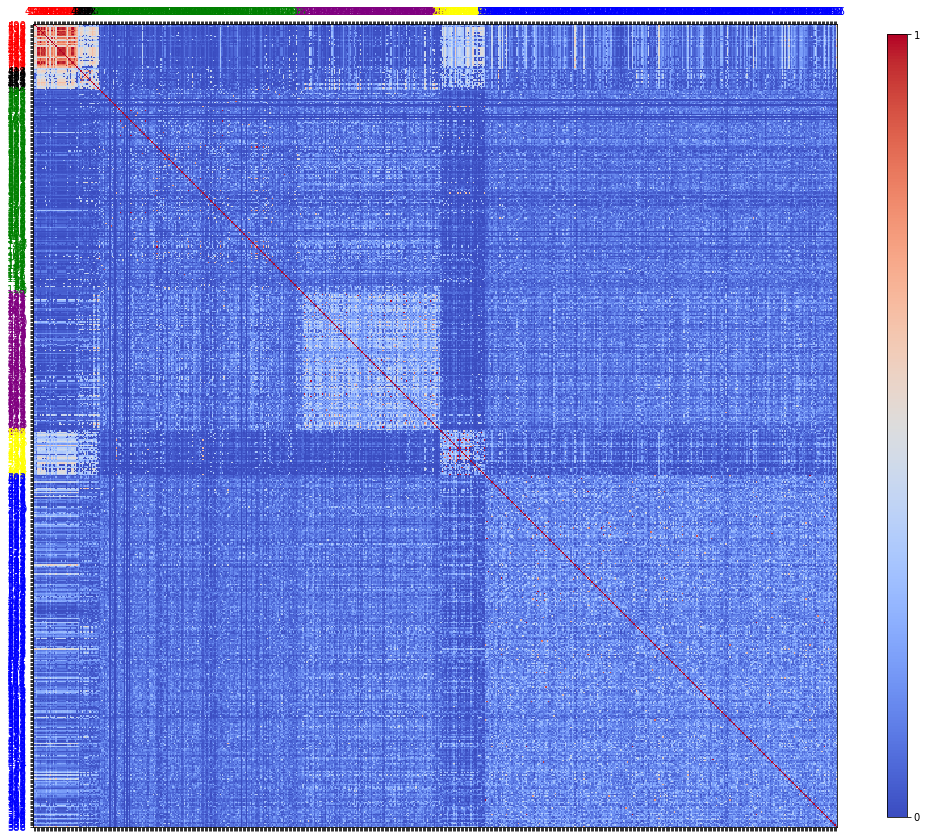

In [51]:
import scipy.cluster.hierarchy as sch
X = matrix_overall_slow
#dist = ((1 - X) / 2.)**.5 
d = sch.distance.pdist(X,'euclidean')
L = sch.linkage(d, method='complete')
ind = sch.fcluster(L, 0.7*d.max(),'distance')
plot_cluster(matrix_overall_slow,ind,col_size=len(ind),grp_size=18)

In [48]:
print(max(ind),min(ind))

6 1


### Affinity Propagation

Converged after 72 iterations.


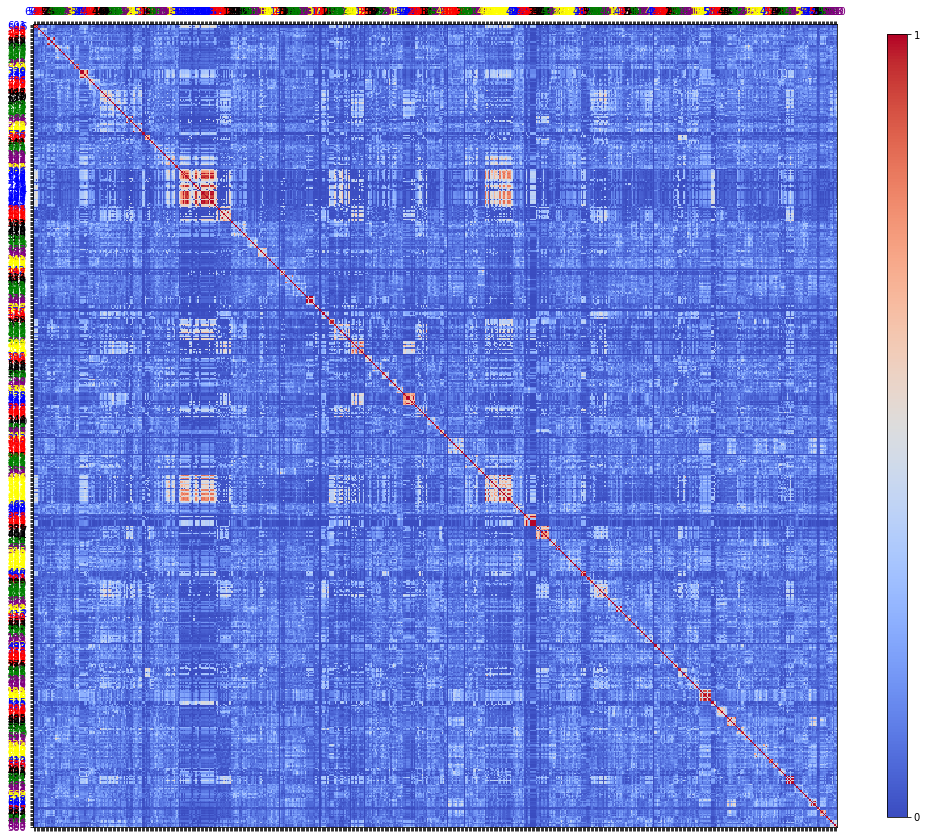

In [55]:
ind_2=get_ap_labels(matrix_overall_slow)
plot_cluster(matrix_overall_slow,ind_2,col_size=len(ind_2),grp_size=18)

In [55]:
print(max(ind_2),min(ind_2))

94 0


### DBSCAN

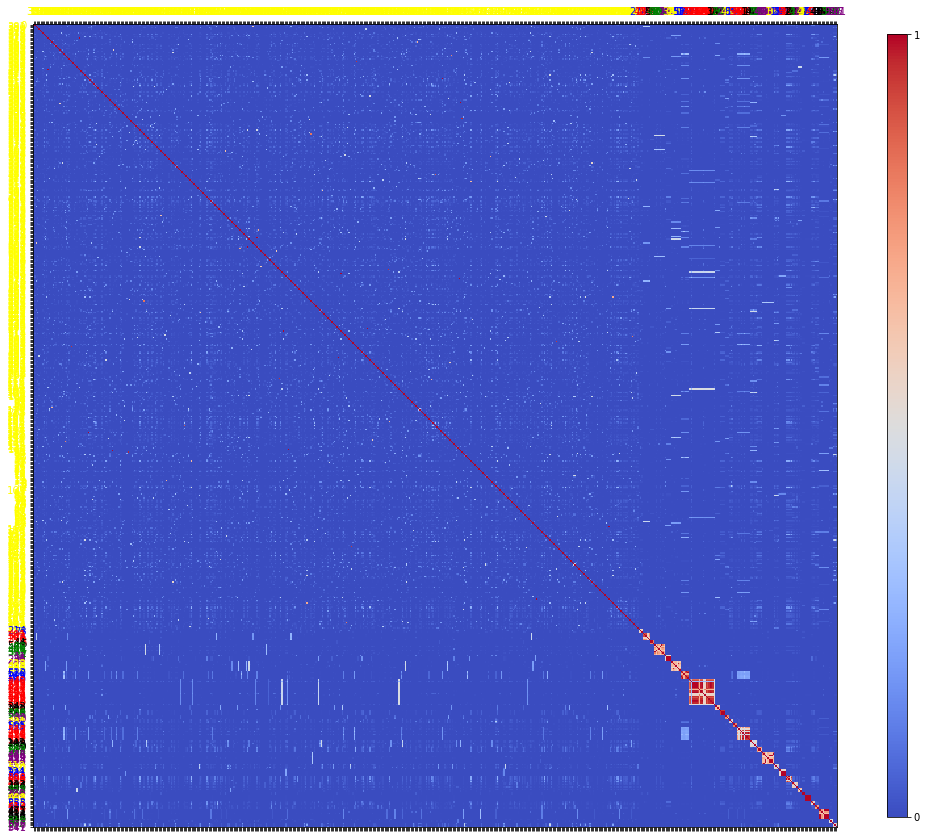

In [130]:
from sklearn.cluster import DBSCAN
ind_3=DBSCAN(metric="precomputed",min_samples=3).fit_predict(1-matrix_overall)
plot_cluster(matrix_overall,ind_3,col_size=len(ind_3),grp_size=18)

In [149]:
print(max(ind_3),min(ind_3))

28 -1


### HDBSCAN

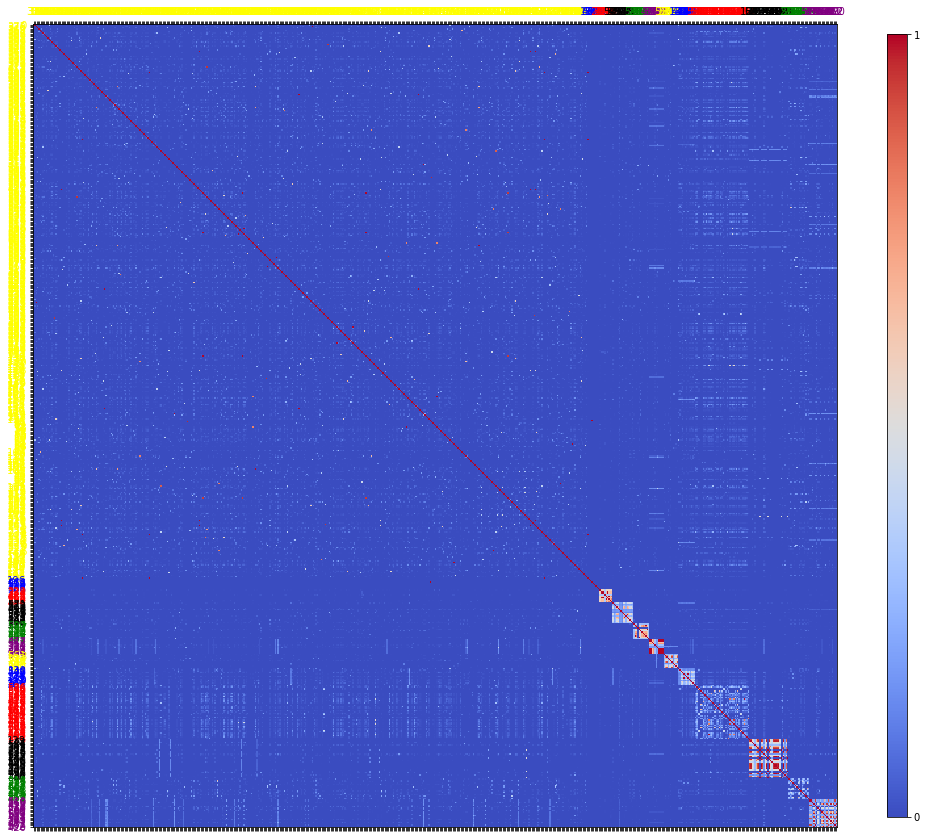

In [132]:
import hdbscan
ind_4=hdbscan.HDBSCAN(min_cluster_size=7,gen_min_span_tree=True,metric='precomputed').fit_predict(1-matrix_overall)
plot_cluster(matrix_overall,ind_4,col_size=len(ind_4),grp_size=18)

In [147]:
print(max(ind_4),min(ind_4))

10 -1


In [4]:
from pydendroheatmap import example
example.run()

Here is the source for this example: 

    import numpy as np
    import pyDendroHeatMap as pdh
    import scipy.cluster.hierarchy as sch
    import scipy.spatial.distance as ssd

    #make up some data
    data = np.random.normal(scale = 50,size=(50,50))
    data[0:25,0:25] += 75
    data[25:,25:] = np.random.poisson(lam=50,size=data[25:,25:].shape)
    #cluster the rows
    row_dist = ssd.squareform(ssd.pdist(data))
    row_Z = sch.linkage(row_dist)
    row_idxing = sch.leaves_list(row_Z)

    row_labels = 50 * ['blah']

    #cluster the columns
    col_dist = ssd.squareform(ssd.pdist(data.T))
    col_Z = sch.linkage(col_dist)
    col_idxing = sch.leaves_list(col_Z)
    #make the dendrogram

    col_labels = 50 * ['blah']

    data = data[:,col_idxing][row_idxing,:]

    heatmap = pdh.DendroHeatMap(heat_map_data=data, left_dendrogram=row_Z, top_dendrogram=col_Z)
    heatmap.row_labels = row_labels
    heatmap.col_labels = col_labels
    heatmap.title = 'An example heatmap'
    heatma

C:\Users\320033853\AppData\Local\Continuum\anaconda3\lib\site-packages\pydendroheatmap\example.py:74: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  row_Z = sch.linkage(row_dist)
C:\Users\320033853\AppData\Local\Continuum\anaconda3\lib\site-packages\pydendroheatmap\example.py:81: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  col_Z = sch.linkage(col_dist)


ValueError: not enough values to unpack (expected 2, got 0)

C:\Users\320033853\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\matrix.py:603: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)
C:\Users\320033853\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\matrix.py:603: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


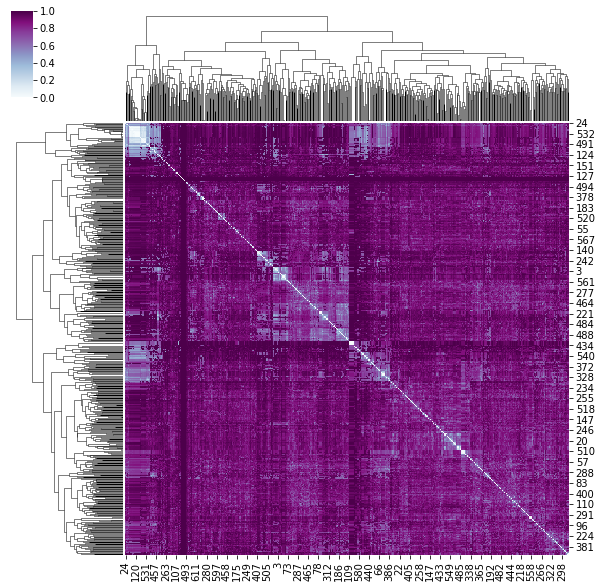

In [31]:
import seaborn as sns
sns.clustermap(X,metric="euclidean", standard_scale=1, method="complete")

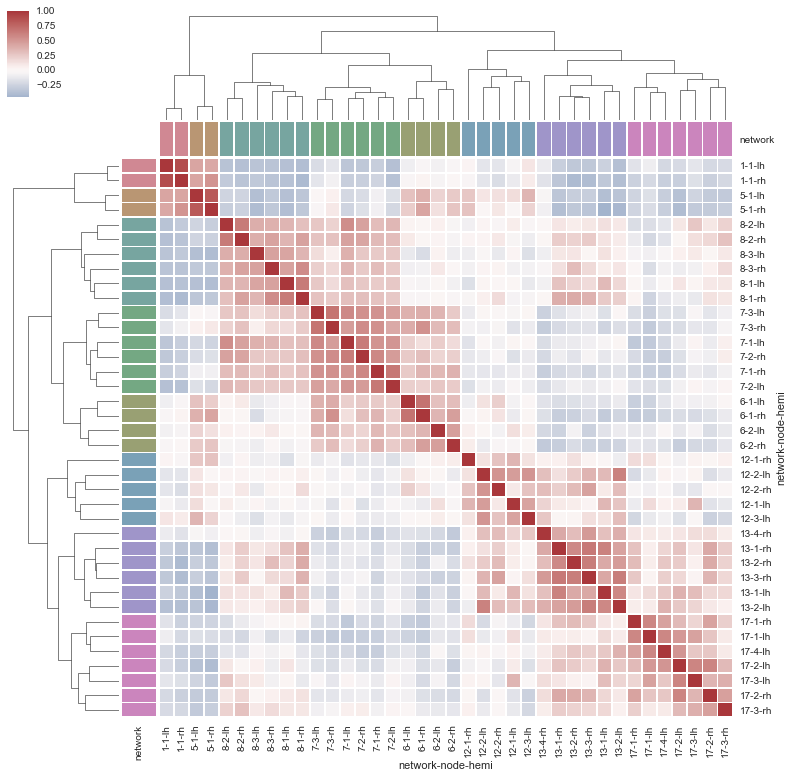

In [63]:

# Load the brain networks example dataset
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Select a subset of the networks
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Create a categorical palette to identify the networks
network_pal = sns.husl_palette(8, s=.45)
network_lut = dict(zip(map(str, used_networks), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df.columns.get_level_values("network")
network_colors = pd.Series(networks, index=df.columns).map(network_lut)

# Draw the full plot
sns.clustermap(X, center=0, cmap="vlag",
               row_colors=l, col_colors=l,
               linewidths=.75, figsize=(13, 13))

In [36]:
LABEL_COLOR_MAP = {i:colors[i%6-1] for i in ind}
for i in range(min(ind),max(ind)+1):
    l=[LABEL_COLOR_MAP[i]*np.count_nonzero(ind == i)]

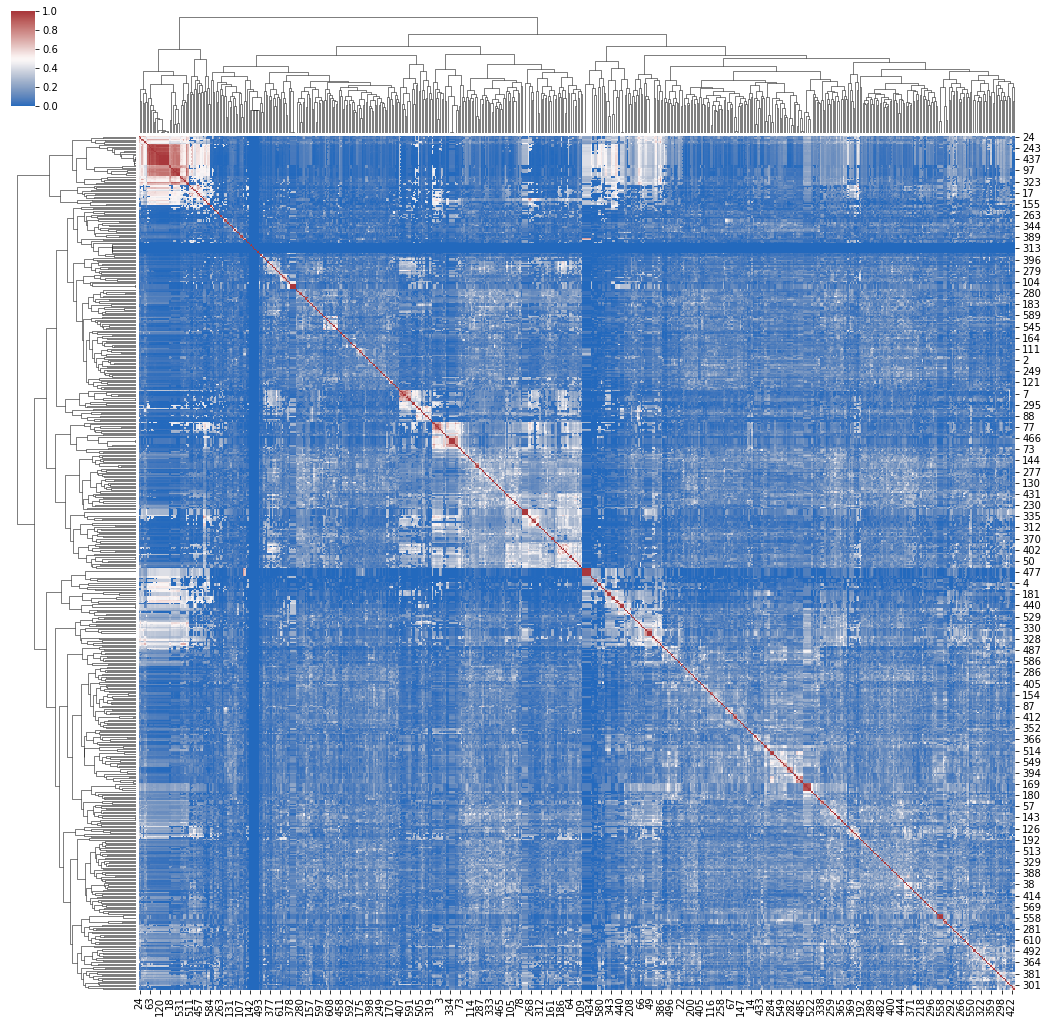

In [80]:
a=sns.clustermap(matrix_overall_slow,cmap="vlag",metric="euclidean",method='complete', figsize=(18, 18))

In [81]:
a.dendrogram_row.reordered_ind

[24,
 349,
 303,
 536,
 108,
 581,
 40,
 63,
 243,
 446,
 129,
 207,
 215,
 99,
 120,
 532,
 437,
 236,
 533,
 100,
 247,
 18,
 373,
 462,
 97,
 547,
 416,
 420,
 531,
 490,
 491,
 285,
 323,
 337,
 557,
 511,
 261,
 450,
 123,
 469,
 17,
 184,
 457,
 250,
 504,
 124,
 219,
 418,
 155,
 584,
 601,
 71,
 497,
 548,
 305,
 317,
 263,
 35,
 363,
 27,
 151,
 324,
 321,
 131,
 344,
 499,
 481,
 41,
 348,
 25,
 107,
 361,
 389,
 314,
 358,
 127,
 376,
 142,
 463,
 325,
 313,
 196,
 176,
 188,
 493,
 517,
 573,
 232,
 396,
 535,
 494,
 377,
 572,
 307,
 76,
 411,
 279,
 149,
 611,
 590,
 426,
 204,
 133,
 409,
 104,
 378,
 171,
 197,
 252,
 408,
 435,
 603,
 280,
 456,
 13,
 106,
 117,
 583,
 8,
 157,
 183,
 205,
 190,
 528,
 604,
 91,
 597,
 26,
 589,
 119,
 506,
 132,
 309,
 608,
 203,
 520,
 545,
 65,
 81,
 12,
 458,
 524,
 308,
 445,
 164,
 375,
 413,
 592,
 256,
 467,
 55,
 360,
 111,
 39,
 175,
 216,
 21,
 353,
 113,
 276,
 2,
 398,
 60,
 417,
 265,
 567,
 562,
 222,
 249,
 351,
 274,
 